# Kotlin Notebook

Some shot experimentation with a Kotlin interpreter for Jupyter.

In [21]:
val result = 2 * 8

result

16

In [22]:
val new_reslult = (Out[4] as Int) * 2

new_reslult

32

In [23]:
%use lib-ext(0.11.0-398)

In [24]:
val kotlin_logo = Image("https://kotlinlang.org/docs/images/kotlin-logo.png", embed = false).withWidth(300)
kotlin_logo

In [25]:
DISPLAY(HTML("<h2>Wow pretty neatho</h2>"))
DISPLAY(kotlin_logo)

Wow pretty neatho

In [26]:
LATEX("c^2 = a^2 + b^2 - 2 a b \\cos\\alpha")

Damn... You can even insert download links into notebooks, from images generated inside the notebook itself?

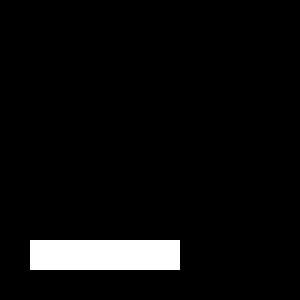

In [28]:
import java.awt.Color
import java.awt.image.BufferedImage

val width = 300
val height = width

val image = BufferedImage(width, height, BufferedImage.TYPE_INT_ARGB)

val graphics = image.createGraphics()
graphics.background = Color.BLACK
graphics.clearRect(0, 0, width, height)
graphics.setRenderingHint(
    java.awt.RenderingHints.KEY_ANTIALIASING,
    java.awt.RenderingHints.VALUE_ANTIALIAS_ON
)
graphics.color = Color.WHITE
graphics.fillRect(width / 10, height * 8 / 10, width * 10 / 20, height / 10)
graphics.dispose()

image

In [29]:
:help

Kotlin Jupyter kernel.
Kernel version: 0.11.0.381
Kotlin version: 1.8.20
JVM version: 11

Commands:
    :help - display help
    :classpath - show current classpath
    :vars - get visible variables values

Magics:
    %use - injects code for supported libraries: artifact resolution, default imports, initialization code, type renderers
        Usage: %use klaxon(5.5), lets-plot
    %trackClasspath - logs any changes of current classpath. Useful for debugging artifact resolution failures
        Usage: %trackClasspath [on|off]
    %trackExecution - logs pieces of code that are going to be executed. Useful for debugging of libraries support
        Usage: %trackExecution [all|generated|off]
    %useLatestDescriptors - use latest versions of library descriptors available. By default, bundled descriptors are used. Note that default behavior is preferred: latest descriptors versions might be not supported by current version of kernel. So if you care about stability of the notebook, avoid us

## How to add dependencies?

In [30]:
USE {
    repositories {
        // Any additional repositories. Maven central is already included
        // maven("<url>")
    }
    dependencies {
        // Here we add kandy plotting library
        implementation("org.jetbrains.kotlinx:kandy-lets-plot:0.4.3")
    }

    // Sometimes library integration are loaded transitively and you don't want them to do it.
    discardIntegrationTypeNameIf {
        it.startsWith("org.jetbrains.kotlinx.dataframe.")
    }
}

In [31]:
import kotlin.random.Random

fun diceNTimesSum(n: Int): Int {
    return (1..n).sumOf { Random.nextInt(1, 7) }
}

val experimentData = (1..100000).map { diceNTimesSum(50) }.groupBy { it }.mapValues { it.value.size }.entries.sortedBy { it.key }
val experimentX = experimentData.map { it.key }
val experimentY = experimentData.map { it.value }

val gaussPlot = plot {
    bars {
        x(experimentX)
        y(experimentY)
    }
}
gaussPlot

120
 
 
 
 
 
 
 
 
 140
 
 
 
 
 
 
 
 
 160
 
 
 
 
 
 
 
 
 180
 
 
 
 
 
 
 
 
 200
 
 
 
 
 
 
 
 
 220
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0
 
 
 
 
 
 
 500
 
 
 
 
 
 
 1,000
 
 
 
 
 
 
 1,500
 
 
 
 
 
 
 2,000
 
 
 
 
 
 
 2,500
 
 
 
 
 
 
 3,000
 
 
 
 
 
 
 3,500
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 y
 
 
 
 
 x

## Kotlin Dataframe

In [33]:
import org.jetbrains.kotlinx.dataframe.api.toDataFrame

val users = listOf("Michiel", "Fred", "Tom").toDataFrame()

users

     value
 0 Michiel
 1    Fred
 2     Tom
